# Titanic (NN)

In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pre-processing

In [5]:
# colm to drop
l1 = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(l1, axis = 1, inplace= True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df["Age"].fillna(df["Age"].median(), axis=0, inplace = True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
emb = list(df["Embarked"].mode())[0]
df["Embarked"].fillna(emb, axis = 0, inplace = True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# age change
df.loc[ df["Age"] <= 16, 'Age'] = 0
df.loc[ (df["Age"] > 16) & (df["Age"] <= 26), 'Age'] = 1
df.loc[ (df["Age"] > 26) & (df["Age"] <= 36), 'Age'] = 2
df.loc[ (df["Age"] > 36) & (df["Age"] <= 62), 'Age'] = 3
df.loc[ df["Age"] > 62, 'Age'] = 4

In [21]:
df["Age"].unique()

array([1., 3., 2., 0., 4.])

In [35]:
def plot_col(col_name):
    sur = df[df['Survived'] == 1][col_name].value_counts()
    dead = df[df['Survived'] == 0][col_name].value_counts()

    temp = pd.DataFrame([sur, dead])
    temp.index = ['sur', 'dead']
    temp.plot(kind = 'bar')

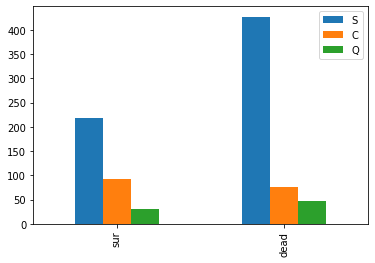

In [36]:
plot_col('Embarked')

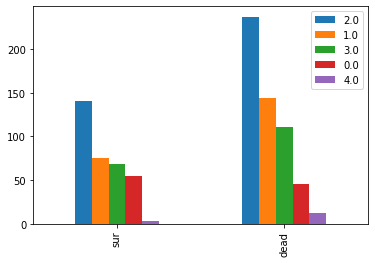

In [37]:
plot_col('Age')

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()

In [41]:
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_emb.fit_transform(df["Embarked"])

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1.0,1,0,7.2500,2
1,1,1,0,3.0,1,0,71.2833,0
2,1,3,0,1.0,0,0,7.9250,2
3,1,1,0,2.0,1,0,53.1000,2
4,0,3,1,2.0,0,0,8.0500,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [44]:
# converting to numpy array
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [45]:
X.shape, y.shape

((891, 7), (891,))

## NN

In [48]:
# libraries
from keras.models import Sequential
from keras.layers import Dense

In [49]:
# step 1 initialise
clf = Sequential()

In [50]:
# step 2 Adding layers
# Hidden layers
clf.add(Dense(128, activation= 'relu', input_shape = (7,)))
clf.add(Dense(64, activation= 'relu'))

In [51]:
# output layer
clf.add(Dense(1, activation= 'sigmoid'))

In [52]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [58]:
# compiling the model
clf.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [59]:
clf.fit(X, y, batch_size= 32, epochs = 50, validation_split= 0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 0s 353us/step - loss: 0.6708 - accuracy: 0.7121 - val_loss: 0.4309 - val_accuracy: 0.7933
Epoch 2/50
712/712 [==============================] - 0s 128us/step - loss: 0.5787 - accuracy: 0.7472 - val_loss: 0.4178 - val_accuracy: 0.7989
Epoch 3/50
712/712 [==============================] - 0s 128us/step - loss: 0.4884 - accuracy: 0.7907 - val_loss: 0.4393 - val_accuracy: 0.8212
Epoch 4/50
712/712 [==============================] - 0s 132us/step - loss: 0.4769 - accuracy: 0.7907 - val_loss: 0.4241 - val_accuracy: 0.8212
Epoch 5/50
712/712 [==============================] - 0s 139us/step - loss: 0.4695 - accuracy: 0.8006 - val_loss: 0.4348 - val_accuracy: 0.7877
Epoch 6/50
712/712 [==============================] - 0s 130us/step - loss: 0.4966 - accuracy: 0.7935 - val_loss: 0.4082 - val_accuracy: 0.8212
Epoch 7/50
712/712 [==============================] - 0s 134us/step - loss: 0.5081 - accur

In [60]:
clf.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

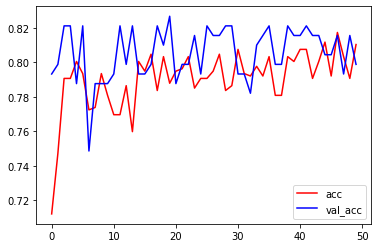

In [62]:
# ploting
acc = clf.history.history['accuracy']
val_acc = clf.history.history['val_accuracy']
plt.plot(acc, label = "acc", c = 'r')
plt.plot(val_acc, label = 'val_acc', c = 'b')
plt.legend()
plt.show()

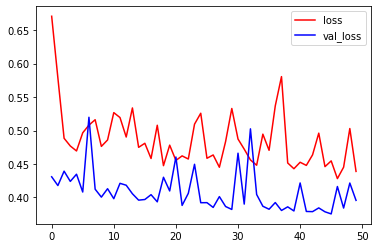

In [63]:
val_loss = clf.history.history['val_loss']
loss = clf.history.history['loss']
plt.plot(loss, label = "loss", c = 'r')
plt.plot(val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.show()